<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

## 1. Regressão Logística

A regressão logística (ou regressão logit) pode ser definida pela seguinte expressão:

\begin{equation}
\widehat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\mathbf{x}^T\boldsymbol{\theta}) = \frac{1}{1+\exp(-\mathbf{x}^T\boldsymbol{\theta})},
\end{equation}

onde $\widehat{p}$ é a probabilidade estimada do modelo e $\sigma(t)$ é uma função sigmoide dada por:

\begin{equation}
    \sigma(t) = \frac{1}{1+\exp(-t)}.
\end{equation}

Geralmente, a regressão logística é usada em tarefas de classificação. Para classificação, as classes estimadas são dadas por:

\begin{equation}
\widehat{y} =
\begin{cases}
0\text{ se }\widehat{p} < 0.5\\
1\text{ se }\widehat{p} \ge 0.5
\end{cases}.
\end{equation}

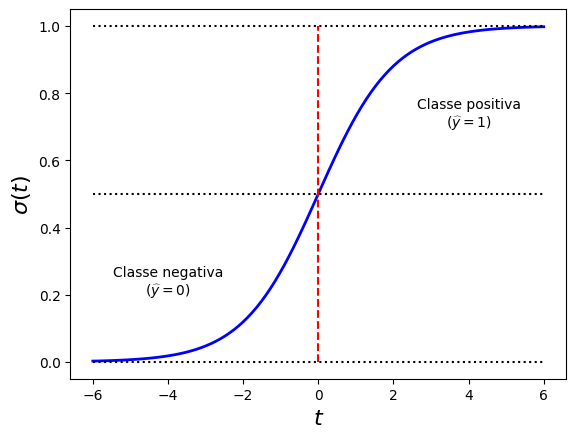

In [4]:
import numpy as np
import matplotlib.pyplot as plt

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.plot(t,
         sig,
         'b-',
         lw = 2)

plt.plot([-lim, lim], [0, 0], 'k:')
plt.plot([-lim, lim], [0.5, 0.5], 'k:')
plt.plot([-lim, lim], [1, 1], 'k:')
plt.plot([0, 0], [0, 1], 'r--')

plt.annotate('Classe positiva\n($\widehat{y} = 1$)',
             xy = (4, 0.7),
             ha = 'center')

plt.annotate('Classe negativa\n($\widehat{y} = 0$)',
             xy = (-4, 0.2),
             ha = 'center')

plt.xlabel('$t$', fontsize = 16)
plt.ylabel('$\sigma(t)$', fontsize = 16)

plt.show()

### 1.1 Função de Custo

Para uma dada instância $i$, podemos calcular o custo associado:

\begin{equation}
c^{(i)}(\boldsymbol{\theta}) =
\begin{cases}
- \log(\widehat{p}^{(i)})\text{, se }y^{(i)} = 1\\
- \log(1 - \widehat{p}^{(i)})\text{, se }y^{(i)} = 0
\end{cases}.
\end{equation}

Tal condição pode ser transformada na seguinte expressão:

\begin{equation}
c^{(i)}(\boldsymbol{\theta}) = - y^{(i)}\log(\widehat{p}^{(i)}) - (1 - y^{(i)})\log(1 - \widehat{p}^{(i)})
\end{equation}

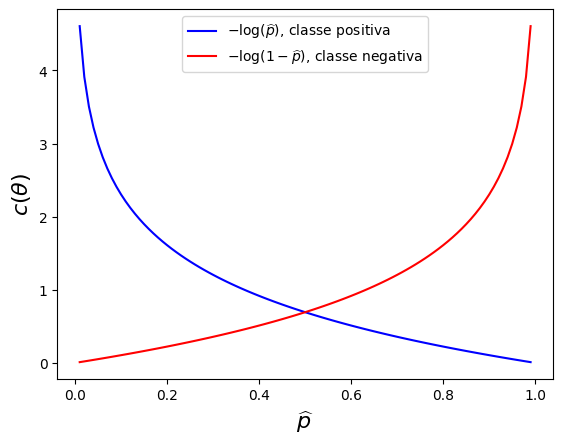

In [3]:
p = np.arange(0.01, 1, 0.01)

plt.plot(p,
         -np.log(p),
         'b-',
         label = '$-\log(\widehat{p})$, classe positiva')

plt.plot(p,
         -np.log(1 - p),
         'r-',
         label = '$-\log(1 - \widehat{p})$, classe negativa')

plt.legend(loc = 'best')

plt.xlabel(r'$\widehat{p}$', fontsize = 16)
plt.ylabel(r'$c(\theta)$', fontsize = 16)
plt.show()

A função de custo para a regressão logística é o log da perda (ou log loss), dada por:

\begin{equation}
J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^m c^{(i)}(\boldsymbol{\theta}) = - \frac{1}{m} \sum_{i=1}^m\left[ y^{(i)}\log(\widehat{p}^{(i)}) + (1 - y^{(i)})\log(1 - \widehat{p}^{(i)})\right].
\end{equation}

- Não existe uma expressão fechada para $J(\boldsymbol{\theta})$;
- Entretanto, ela é convexa! Logo, podemos usar um algoritmo iterativo de otimização (e.g., o Gradiente Descendente).

A derivada dessa função de custo fica:

\begin{equation}
\frac{\partial}{\partial \theta_j}J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^m\left[ \widehat{p}^{(i)} - y^{(i)}\right] x_j^{(i)}.
\end{equation}

### 1.2 Fronteira de decisão

![picture](https://drive.google.com/thumbnail?id=1NRsvq0IwY741VYXopfA4xpX77ARdzDrh&sz=w2400)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)

print(iris.feature_names)
print(iris.target_names)

df = iris.frame

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### 1.2.1 Para uma característica

In [5]:
from sklearn.model_selection import train_test_split

X = df[['petal width (cm)']].to_numpy()
y = (df['target'] == 2).astype(np.int64) # , not virginica = 0, virginica = 1

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

In [7]:
from sklearn.linear_model import LogisticRegression

print(X_train)
print(y_train)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

[[0.2]
 [0.1]
 [1.9]
 [1.6]
 [1.5]
 [0.4]
 [0.2]
 [1. ]
 [1.5]
 [1.8]
 [1.4]
 [2.5]
 [1.3]
 [2.1]
 [1.5]
 [0.2]
 [2. ]
 [1. ]
 [0.2]
 [0.3]
 [0.4]
 [1. ]
 [1.8]
 [0.2]
 [0.2]
 [0.5]
 [1.3]
 [0.2]
 [1.2]
 [2.2]
 [0.2]
 [1.3]
 [2. ]
 [0.2]
 [1.8]
 [1.9]
 [1. ]
 [1.5]
 [2.3]
 [1.3]
 [0.4]
 [1. ]
 [1.9]
 [0.2]
 [0.2]
 [1.1]
 [1.7]
 [0.2]
 [2.4]
 [0.2]
 [0.6]
 [1.8]
 [1.1]
 [2.3]
 [1.6]
 [1.4]
 [2.3]
 [1.3]
 [0.2]
 [0.1]
 [1.5]
 [1.8]
 [0.2]
 [0.3]
 [0.2]
 [1.5]
 [2.4]
 [0.3]
 [2.1]
 [2.5]
 [0.2]
 [1.4]
 [1.5]
 [1.8]
 [1.4]
 [2.3]
 [0.2]
 [2.1]
 [1.5]
 [2. ]
 [1. ]
 [1.4]
 [1.4]
 [0.3]
 [1.3]
 [1.2]
 [0.2]
 [1.3]
 [1.8]
 [2.1]
 [0.4]
 [1. ]
 [2.5]
 [1.6]
 [0.1]
 [2.4]
 [0.2]
 [1.5]
 [1.9]
 [1.8]
 [1.3]
 [1.8]
 [1.3]
 [1.3]
 [2. ]
 [1.8]
 [0.2]
 [1.3]
 [1.7]
 [0.2]
 [1.2]
 [2.1]]
4      0
32     0
142    1
85     0
86     0
      ..
71     0
106    1
14     0
92     0
102    1
Name: target, Length: 112, dtype: int64


LogisticRegression(random_state=42)

In [23]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # simulated features
p = log_reg.predict_proba(X_new) # probabilities of the classes

ValueError: X has 1 features, but LogisticRegression is expecting 2 features as input.

In [32]:
X_new[p >= 0.5]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 99

In [30]:
decision_boundary = X_new[p[:, 1] >= 0.5][0, 0]

plt.plot(X_new,
         p[:, 0],
         'b--',
         lw = 2,
         label = 'Não-virginica')

plt.plot(X_new,
         p[:, 1],
         'g-',
         lw = 2,
         label = 'Virginica')

plt.plot([decision_boundary, decision_boundary],
         [0, 1],
         'k:',
         lw = 2,
         label = 'Fronteira de Decisão')

plt.plot(X_train[y_train == 0],
         y_train[y_train == 0],
         'bs',
         alpha = 0.5)

plt.plot(X_train[y_train == 1],
         y_train[y_train == 1],
         'g^',
         alpha = 0.5)

plt.xlabel('Comprimento da Pétala (cm)')
plt.ylabel('Probabilidade')
plt.legend(loc = 'center left')
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 99

In [33]:
y_hat = log_reg.predict([[1.5],
                         [1.7]])
y_hat

ValueError: X has 1 features, but LogisticRegression is expecting 2 features as input.

#### 1.2.2 Para duas características

In [9]:
X = df[['petal length (cm)', 'petal width (cm)']].to_numpy()
y = (df['target'] == 2).astype(np.int64) # , not virginica = 0, virginica = 1

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

print(X_train)
print(y_train)

[[1.4 0.2]
 [1.5 0.1]
 [5.1 1.9]
 [4.5 1.6]
 [4.7 1.5]
 [1.3 0.4]
 [1.5 0.2]
 [3.7 1. ]
 [5.1 1.5]
 [5.5 1.8]
 [4.4 1.4]
 [6.1 2.5]
 [4.2 1.3]
 [6.6 2.1]
 [4.5 1.5]
 [1.4 0.2]
 [6.7 2. ]
 [4.1 1. ]
 [1.4 0.2]
 [1.3 0.3]
 [1.9 0.4]
 [3.5 1. ]
 [4.9 1.8]
 [1.9 0.2]
 [1.6 0.2]
 [1.7 0.5]
 [4.2 1.3]
 [1.5 0.2]
 [4.2 1.2]
 [6.7 2.2]
 [1.4 0.2]
 [4.3 1.3]
 [5.  2. ]
 [1.4 0.2]
 [4.8 1.8]
 [5.1 1.9]
 [4.  1. ]
 [4.5 1.5]
 [5.4 2.3]
 [4.  1.3]
 [1.7 0.4]
 [3.3 1. ]
 [5.3 1.9]
 [1.4 0.2]
 [1.2 0.2]
 [3.8 1.1]
 [5.  1.7]
 [1.5 0.2]
 [5.1 2.4]
 [1.5 0.2]
 [1.6 0.6]
 [4.8 1.8]
 [3.  1.1]
 [5.7 2.3]
 [5.1 1.6]
 [5.6 1.4]
 [6.1 2.3]
 [4.  1.3]
 [1.4 0.2]
 [1.1 0.1]
 [5.  1.5]
 [6.  1.8]
 [1.5 0.2]
 [1.4 0.3]
 [1.3 0.2]
 [4.9 1.5]
 [5.6 2.4]
 [1.4 0.3]
 [5.5 2.1]
 [6.  2.5]
 [1.3 0.2]
 [4.7 1.4]
 [4.6 1.5]
 [4.8 1.8]
 [4.7 1.4]
 [5.3 2.3]
 [1.6 0.2]
 [5.4 2.1]
 [4.2 1.5]
 [5.2 2. ]
 [3.5 1. ]
 [3.9 1.4]
 [4.6 1.4]
 [1.3 0.3]
 [4.6 1.3]
 [4.4 1.2]
 [1.5 0.2]
 [4.1 1.3]
 [6.3 1.8]
 [5.7 2.1]
 [1.5 0.4]

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

print(log_reg.intercept_, log_reg.coef_)

[-15.81793954] [[2.56143021 2.00397536]]


In [11]:
x1, x2 = np.meshgrid(np.linspace(1, 7, 500), # first feature
                     np.linspace(0, 3, 200)) # second feature

X_new = np.column_stack((x1.ravel(), x2.ravel()))
print(X_new.shape)

(100000, 2)


In [12]:
p = log_reg.predict_proba(X_new)
print(p.shape)

(100000, 2)


Lembrando que $\widehat{p} = 0.5 \Rightarrow t = 0$. Portanto,

\begin{equation}
t = \theta_0 + \theta_1 x_1 + \theta_2 x_2 \Rightarrow x_2 =  -(\theta_0 + \theta_1 x_1) / \theta_2.
\end{equation}

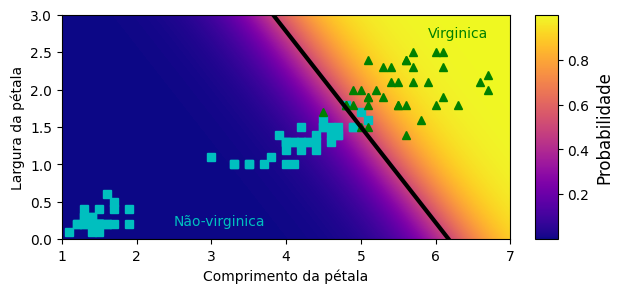

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

petal_lenghts = np.array([3.8, 6.2])
petal_widths = - (log_reg.intercept_[0] + log_reg.coef_[0, 0] * petal_lenghts) / log_reg.coef_[0, 1]

plt.plot(X_train[y_train == 0, 0],
         X_train[y_train == 0, 1],
         'cs') # not virginica = 0

plt.plot(X_train[y_train == 1, 0],
         X_train[y_train == 1, 1],
         'g^') # virginica = 1

plt.plot(petal_lenghts,
         petal_widths,
         'k-',
         lw = 3)

plt.annotate('Não-virginica',
             xy = (0.25, 0.05),
             xycoords = 'axes fraction',
             ha = 'left',
             va = 'bottom',
             color = 'c')

plt.annotate('Virginica',
             xy = (0.95, 0.95),
             xycoords = 'axes fraction',
             ha = 'right',
             va = 'top',
             color = 'g')

plt.xlabel('Comprimento da pétala')
plt.ylabel('Largura da pétala')
plt.axis([1, 7, 0, 3])

ax = plt.gca()

surface = p[:, 1].reshape((200, 500))
limites_teta = [1, 7, 0, 3]
image = ax.imshow(surface,
                  extent = limites_teta, # right, left, bottom, top
                  cmap = plt.cm.plasma,
                  origin = 'lower')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right',
                          size = '5%',
                          pad = 0.25)

cbar = plt.colorbar(image,
                    cax = cax)

cbar.set_label(r'Probabilidade', size = 12)